# Машинное обучение, ФЭН ВШЭ

# Практическое задание 4

Выполнила Головина Мария, БЭК145, 4-сложная

### I. Разложение ошибки на смещение и разброс
#### Теоретическое вступление
На занятиях мы разбирали примеры аналитического вычисления смещения и разброса нескольких алгоритмов обучения. Для большинства моделей данных и алгоритмов обучения аналитически рассчитать математические ожидания в формулах не удастся. Однако мат. ожидания можно оценивать приближенно. Чтобы оценить математическое ожидание $\mathbb{E}_{\bar x} f(\bar x)$ функции от многомерной случайной величины $\bar x = (x_1, \dots, x_d)$, $\bar x \sim p(\bar x)$, можно сгенерировать выборку из распределения $p(\bar x)$ и усреднить значение функции на элементах этой выборки:
$$\mathbb{E}_{\bar x} f(x) = \int f(\bar x) p(\bar x) d \bar x \approx \frac 1 m \sum_{i=1}^m f(\bar x_i), \, \bar x_i \sim p(\bar x), i = 1, \dots, m.$$

Для оценки многомерных интегралов ($d > 1$) объекты лучше генерировать, следуя специальным схемам, чтобы адекватно оценивать значение интеграла в областях высокой плотности. Мы не будем так усложнять задачу, а просто будем генерировать $\bar x_i$ независимо.

In [152]:
import numpy as np

Например, оценим $\mathbb{E}_x x^2,$ $x \sim \mathcal{N}(\mu=5, \sigma=3)$ (из теории вероятностей мы знаем, что
$\mathbb{E}_x x^2 = \sigma^2 + \mu^2 = 34$):

In [153]:
x = np.random.normal(loc=5, scale=3, size=1000)
(x**2).mean()

34.223808848216407

Или посчитаем многомерный интеграл $\mathbb{E}_{\bar x} \bar x^T \bar x = \mathbb{E}_{\bar x} \sum_{i=1}^d x_i^2$, $\bar x \sim \mathcal{N}(\bar \mu=(1, \dots, 1), \Sigma=I)$ при $d = 10$ (аналитический ответ 20):

In [154]:
d = 10
X = np.random.multivariate_normal(np.ones(10), np.eye(10), size=1000)
(X**2).sum(axis=1).mean()

19.917878046403377

Чтобы оценить интеграл по выборке, можно сгенерировать несколько выборок, вычислить на них значение функции и усреднить. Например, для интеграла $\mathbb{E}_X [\mu(X)(x)]$ генерируются выборки $X_1, \dots, X_m$, на каждой из них обучается алгоритм $\mu$ и делается предсказание для объекта $x$.

>#### Практическая часть
#####  Построение "среднего" алгоритма $\mathbb{E}_X [\mu(X)]$
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм $\mathbb{E}_X [\mu(X)]$ аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [155]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

>__1 (0.6 балла)__
1. Сгенерируйте выборку x из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных y как сумму f(x) и случайного шума, сгенерированного из равномерного распределения на отрезке [-1, 1] (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: f(x) и зависимость, восстановленную решающим деревом.

>    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

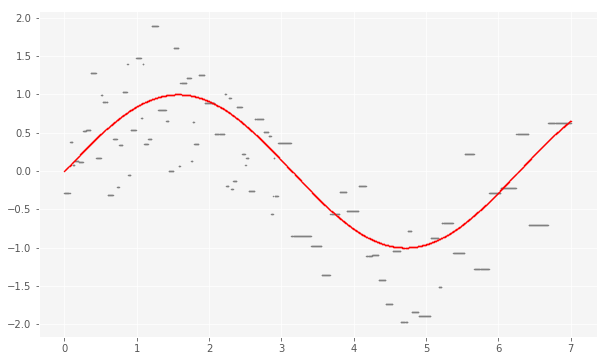

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='whitesmoke'
plt.rcParams['figure.figsize'] = 10, 6

x = np.random.exponential(4, size = sample_size).reshape(-1, 1)
y = f(x)+np.random.uniform(size = sample_size, low = -1, high = 1).reshape(-1,1)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(x, y).predict(linspace.reshape(-1,1))

plt.scatter(linspace, dt, s = 1, c = 'gray', alpha = 1)
plt.scatter(linspace, f(linspace), s = 1, c = 'r')
plt.show()

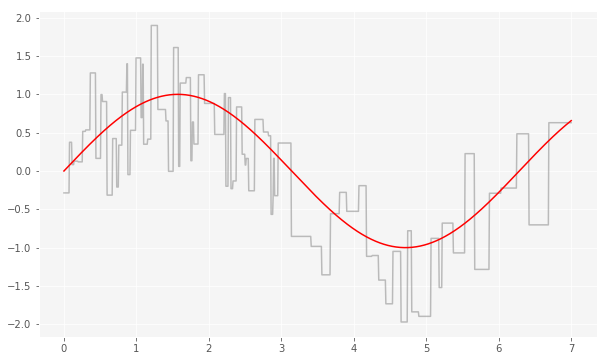

In [157]:
plt.plot(linspace, dt, c = 'gray', alpha = .5)
plt.plot(linspace, f(linspace), c = 'r');

>__2 (0.6 балла):__

>Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

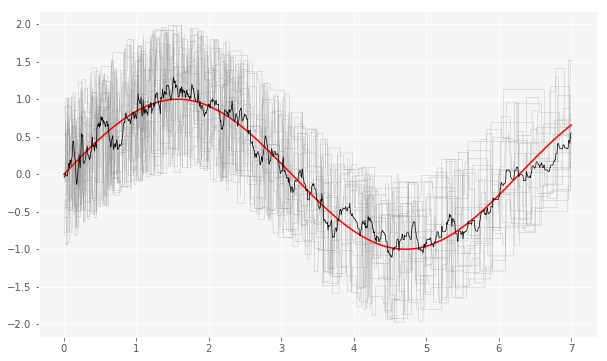

In [158]:
dtrees = []
for iter_ in range(samples_num):
    x = np.random.exponential(4, size = sample_size).reshape(-1, 1)
    y = f(x)+np.random.uniform(size = sample_size, low = -1, high = 1).reshape(-1,1)
    dt = DecisionTreeRegressor().fit(x, y).predict(linspace.reshape(-1,1))
    dtrees.append(dt)
    plt.plot(linspace, dt, c = 'gray', alpha = .5, linewidth =  .4)
plt.plot(linspace, f(linspace), c = 'r')
plt.plot(linspace, np.mean(dtrees, 0), color = 'black', linewidth =  .7);
    

>__3 (0.2 балла):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

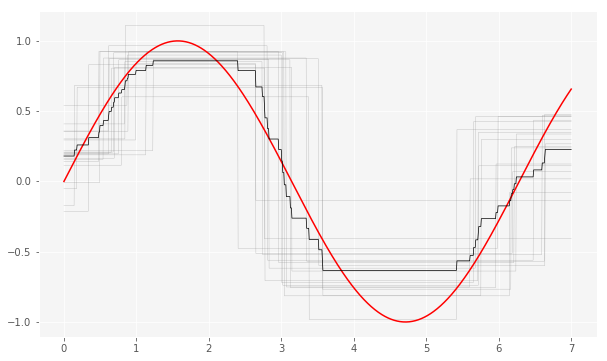

In [159]:
dtrees = []
for iter_ in range(samples_num):
    x = np.random.exponential(4, size = sample_size).reshape(-1, 1)
    y = f(x)+np.random.uniform(size = sample_size, low = -1, high = 1).reshape(-1,1)
    dt = DecisionTreeRegressor(max_depth = 2).fit(x, y).predict(linspace.reshape(-1,1))
    dtrees.append(dt)
    plt.plot(linspace, dt, c = 'gray', alpha = .5, linewidth =  .4)
plt.plot(linspace, f(linspace), c = 'r')
plt.plot(linspace, np.mean(dtrees, 0), color = 'black', linewidth =  .7);

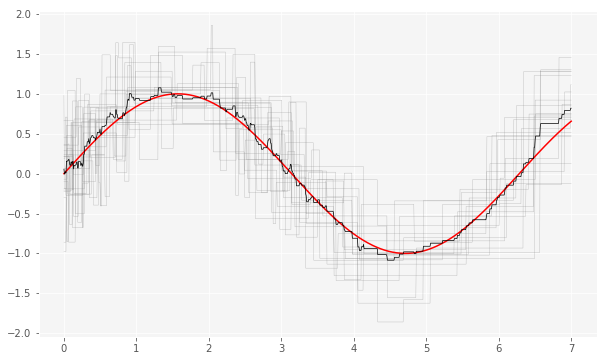

In [160]:
dtrees = []
for iter_ in range(samples_num):
    x = np.random.exponential(4, size = sample_size).reshape(-1, 1)
    y = f(x)+np.random.uniform(size = sample_size, low = -1, high = 1).reshape(-1,1)
    dt = DecisionTreeRegressor(max_depth = 4).fit(x, y).predict(linspace.reshape(-1,1))
    dtrees.append(dt)
    plt.plot(linspace, dt, c = 'gray', alpha = .5, linewidth =  .4)
plt.plot(linspace, f(linspace), c = 'r')
plt.plot(linspace, np.mean(dtrees, 0), color = 'black', linewidth =  .7);

>__4 (0.6 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

У деревьев большей глубины ниже смещение, но выше разброс. Как заметно по графикам, наиболее низкое смещение наблюдается в первом случае. По умолчанию на max_depth нет ограничения: разделение узлов продолжается до тех пор, пока все листья не будут содержать только объекты из одного класса, или пока не достигнем минимального установленного количества объектов, при котором ещё разрешаем разделение узла (min_samples_split). Таким образом, в первом случае деревья могут иметь большую глубину.

Во втором случае, с max_depth = 4, bias больше, а при max_depth = 2 он наибольший из рассмотренных случаев.

__5 (1 балл)__
Проделайте тот же эксперимент с линейной регрессией и SVM с rbf ядром и параматрами $\gamma = 1$, $\gamma = 100$. Какие выводы можно сделать?

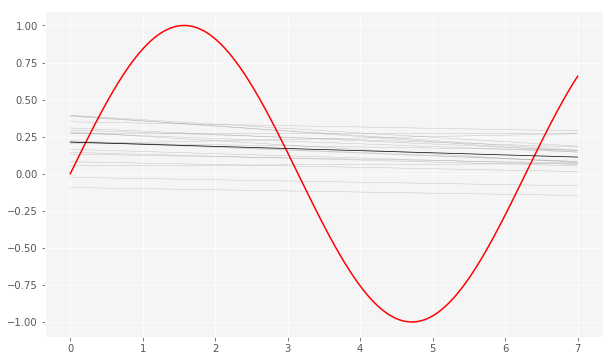

In [161]:
from sklearn.linear_model import LinearRegression

lrs = []
for iter_ in range(samples_num):
    x = np.random.exponential(scale=8, size = sample_size).reshape(-1, 1)
    y = f(x)+np.random.uniform(size = sample_size, low = -1, high = 1).reshape(-1,1)
    lr = LinearRegression().fit(x, y.ravel()).predict(linspace.reshape(-1,1))
    lrs.append(lr)
    plt.plot(linspace, lr, c = 'gray', alpha = .5, linewidth =  .4)
plt.plot(linspace, f(linspace), c = 'r')
plt.plot(linspace, np.mean(lrs, 0), color = 'black', linewidth =  .7);

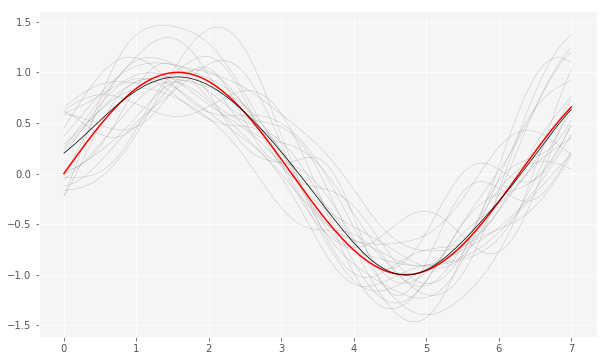

In [162]:
from sklearn.svm import SVR

svrs = []
for iter_ in range(samples_num):
    x = np.random.exponential(scale=8, size = sample_size).reshape(-1, 1)
    y = f(x)+np.random.uniform(size = sample_size, low = -1, high = 1).reshape(-1,1)
    svr = SVR(kernel='rbf', gamma = 1).fit(x, y.ravel()).predict(linspace.reshape(-1,1))
    svrs.append(svr)
    plt.plot(linspace, svr, c = 'gray', alpha = .5, linewidth =  .4)
plt.plot(linspace, f(linspace), c = 'r')
plt.plot(linspace, np.mean(svrs, 0), color = 'black', linewidth =  .7);
#plt.scatter(x, f(x), s = 18, color = 'g');

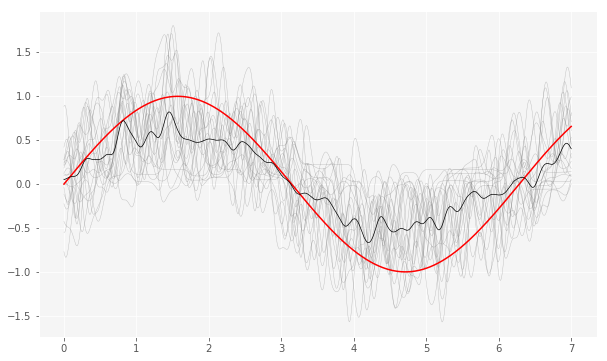

In [163]:
svrs = []
for iter_ in range(samples_num):
    x = np.random.exponential(8, size = sample_size).reshape(-1, 1)
    y = f(x)+np.random.uniform(size = sample_size, low = -1, high = 1).reshape(-1,1)
    svr = SVR(kernel='rbf', gamma = 100).fit(x, y.ravel()).predict(linspace.reshape(-1,1))
    svrs.append(svr)
    plt.plot(linspace, svr, c = 'gray', alpha = .5, linewidth =  .4)
plt.plot(linspace, f(linspace), c = 'r')
plt.plot(linspace, np.mean(svrs, 0), color = 'black', linewidth =  .7);
#plt.scatter(x, f(x), s = 18, color = 'g');

Большие значения $\gamma$ приводят к большему variance и меньшему bias на обучающей выборке; при таком сильном переобучении, как на втором графике, ошибка на тестовой выборке очень велика, в то время как SVR с $\gamma$ = 1 сохранил неплохую общность и хорошо приближает форму графика

### II. Решающие деревья

>__5 (1 балл)__

>Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-rac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc - это класс 0, good, vgood - класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend - класс 0, very_recom, priority, spec_prior - класс 1).

In [164]:
import pandas as pd 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

mushroom_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushroom = pd.read_csv(mushroom_url, header=None)
mushroom_y = mushroom[0]
mushroom_x = mushroom.loc[:,1:]
mushroom_y.head(3)

0    p
1    e
2    e
Name: 0, dtype: object

In [165]:
mushroom_y = le.fit_transform(mushroom_y)
mushroom_y[:3]

array([1, 0, 0])

In [166]:
tt_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
tt = pd.read_csv(tt_url, header=None)
tt_y = tt[9]
tt_x = tt.loc[:, :8]
tt_y = le.fit_transform(tt_y)

In [167]:
cars_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
cars = pd.read_csv(cars_url, header=None)
cars_y = cars[6]
cars_x = cars.loc[:, :5]
cars_y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: 6, dtype: int64

In [168]:
cars_y[cars_y.isin(['unacc', 'acc'])] = 0
cars_y[cars_y.isin(['vgood', 'good'])] = 1
cars_y.value_counts()

0    1594
1     134
Name: 6, dtype: int64

In [169]:
nursery_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
nursery = pd.read_csv(nursery_url, header=None)
nursery_y = nursery[8]
nursery_x = nursery.loc[:, :7]

nursery_y[nursery_y.isin(['very_recom', 'priority', 'spec_prior'])] = 1
nursery_y[nursery_y.isin(['not_recom', 'recommend'])] = 0

>Закодируйте категориальные признаки, использовав LabelEncoder. 
>С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTreeClassifier, считающий все признаки вещественными
* DecisionTreeClassfier, считающий все признаки категориальными
* DecisionTreeClassifier, c корректным разбиением на категориальные и вещественные признаки.

>Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.

Некоторые выводы о датасетах на основе их описаний:
* в mushrooms все признаки категориальные, и категории нельзя упорядочить; лучше использовать one-hot-encoder
* в tic tac toe все признаки тоже категориальные
* в cars все признаки порядковые -- надо присвоить правильно упорядоченные значения labelencoder'ом
* в nursery все признаки тоже можно считать порядковыми

Не очень понятно, что требуется, поскольку сначала нам предлагается все категориальные признаки обязательно закодировать LabelEncoder'ом. Вероятно, DecisionTreeClassifier считает признак вещественным, если он закодирован LabelEncoder'ом, а категориальный признак был бы закодирован через группу дамми-признаков. Поэтому для всех датасетов проведём 2 вида обработки данных: с помощью LabelEncoder и с помощью pd.get_dummies. Кроме того, действительно вещественных признаков тут нет (есть признаки типа 1, 2, 3, more, но их можно считать порядковыми). Поэтому на самом деле понадобится обрабатывать каждый датасет только двумя способами, а не тремя: для каждого датасета пункт "DecisionTreeClassifier, c корректным разбиением на категориальные и вещественные признаки" совпадает с одним из предыдущих.

С mushroom и tic tac tie всё легко -- категории не упорядочены, поэтому labelencoder просто здесь не самое лучшее решение, никакой порядок категорий не улучшит ситуацию

In [170]:
# для пункта DecisionTreeClassifier, считающий все признаки вещественными
category = mushroom_x.select_dtypes(exclude = [np.number])
colnames = category.columns.values
mushroom_x_new = pd.DataFrame()
for c in colnames:
     mushroom_x_new = pd.concat([mushroom_x_new, pd.DataFrame(le.fit_transform(category[c]))], axis = 1)
mushroom_x_new.columns = colnames
mushroom_x_new.head(3)

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3


Правильнее здесь использовать дамми-переменные, поскольку категории несравнимы:

In [171]:
# для пункта DecisionTreeClassifier, считающий все признаки категориальными + DecisionTreeClassifier 
# c корректным разбиением на категориальные и вещественные признаки, потому что тут реально все категориальные
category = mushroom_x.select_dtypes(exclude = [np.number])
colnames = category.columns.values
mushroom_x_new_cat = pd.DataFrame()
for c in colnames:
     mushroom_x_new_cat = pd.concat([mushroom_x_new_cat, pd.get_dummies(category[c], prefix=c).iloc[:, 1:]], axis = 1)
mushroom_x_new_cat.head(3)

,1_c,1_f,1_k,1_s,1_x,2_g,2_s,2_y,3_c,3_e,...,21_n,21_s,21_v,21_y,22_g,22_l,22_m,22_p,22_u,22_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Аналогично для tic tac toe:

In [172]:
# для пункта DecisionTreeClassifier, считающий все признаки вещественными 
category = tt_x.select_dtypes(exclude = [np.number])
colnames = category.columns.values
tt_x_new = pd.DataFrame()
for c in colnames:
     tt_x_new = pd.concat([tt_x_new, pd.DataFrame(le.fit_transform(category[c]))], axis = 1)
tt_x_new.columns = colnames
tt_x_new.head(3)

,0,1,2,3,4,5,6,7,8
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2


In [173]:
# для пункта DecisionTreeClassifier, считающий все признаки категориальными + DecisionTreeClassifier 
# c корректным разбиением на категориальные и вещественные признаки, потому что тут реально все категориальные
category = tt_x.select_dtypes(exclude = [np.number])
colnames = category.columns.values
tt_x_new_cat = pd.DataFrame()
for c in colnames:
     tt_x_new_cat = pd.concat([tt_x_new_cat, pd.get_dummies(category[c], prefix=c).iloc[:, 1:]], axis = 1)
tt_x_new_cat.head(3)

,0_o,0_x,1_o,1_x,2_o,2_x,3_o,3_x,4_o,4_x,5_o,5_x,6_o,6_x,7_o,7_x,8_o,8_x
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1


Признаки в cars и nursery придётся кодировать более индивидуально. Для начала обработаем их для DecisionTreeClassifier так, словно они все категориальные (просто на все применяем get_dummies ), чтобы продемонстрировать потом, что здесь подход, игнорирующий упорядоченность/сравнимость категорий, неверен и даёт худшие результаты:

In [174]:
category = cars_x.select_dtypes(exclude = [np.number])
colnames = category.columns.values
cars_x_new_cat = pd.DataFrame()
for c in colnames:
     cars_x_new_cat = pd.concat([cars_x_new_cat, pd.get_dummies(category[c], prefix=c).iloc[:, 1:]], axis = 1)
cars_x_new.columns = colnames
cars_x_new_cat.head(3)

,0_low,0_med,0_vhigh,1_low,1_med,1_vhigh,2_3,2_4,2_5more,3_4,3_more,4_med,4_small,5_low,5_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


Теперь закодируем их как порядковые, а не как дамми, -- здесь этот подход правильнее.

In [175]:
category = cars_x.select_dtypes(exclude = [np.number])
colnames = category.columns.values
cars_x_new = pd.DataFrame()
for c in colnames:
     cars_x_new = pd.concat([cars_x_new, pd.DataFrame(le.fit_transform(category[c]))], axis = 1)
cars_x_new.columns = colnames
cars_x_new.head(3)

,0,1,2,3,4,5
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0


Однако  Labelencoder'ом это некорректно делать, потому что он кодирует разные категории по алфавиту. Нужно было бы вручную переименовывать категории, чтобы сделать преобразование с сохранением правильного по смыслу порядка. Проще сделаем это вручную.

In [176]:
le.fit(['low', 'med', 'high', 'vhigh'])
le.classes_

array(['high', 'low', 'med', 'vhigh'], 
      dtype='<U5')

In [177]:
cars_xc = cars_x.copy()
cars_xc[cars_xc == 'low'] = 0
cars_xc[cars_xc == 'med'] = 1
cars_xc[cars_xc == 'high'] = 2
cars_xc[cars_xc == 'vhigh'] = 3
cars_xc[cars_xc == 'small'] = 0
cars_xc[cars_xc == 'big'] = 2
cars_xc[cars_xc == 'more'] = 6
cars_xc[cars_xc == '5more'] = 5

Аналогично тремя способами закодируем признаки в датасете nursery:

In [178]:
category = nursery_x.select_dtypes(exclude = [np.number])
colnames = category.columns.values
nursery_x_new_cat = pd.DataFrame()
for c in colnames:
     nursery_x_new_cat = pd.concat([nursery_x_new_cat, pd.get_dummies(category[c], prefix=c).iloc[:, 1:]], axis = 1)
nursery_x_new_cat.head(3)

,0_pretentious,0_usual,1_improper,1_less_proper,1_proper,1_very_crit,2_completed,2_foster,2_incomplete,3_2,3_3,3_more,4_critical,4_less_conv,5_inconv,6_problematic,6_slightly_prob,7_priority,7_recommended
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
category = nursery_x.select_dtypes(exclude = [np.number])
colnames = category.columns.values
nursery_x_new = pd.DataFrame()
for c in colnames:
     nursery_x_new = pd.concat([nursery_x_new, pd.DataFrame(le.fit_transform(category[c]))], axis = 1)
nursery_x_new.columns = colnames
nursery_x_new.head(3)

,0,1,2,3,4,5,6,7
0,2,3,0,0,0,0,0,2
1,2,3,0,0,0,0,0,1
2,2,3,0,0,0,0,0,0


In [180]:
nursery_xc = nursery_x.copy()
nursery_xc[nursery_xc == 'usual'] = 0
nursery_xc[nursery_xc == 'pretentious'] = 1
nursery_xc[nursery_xc == 'great_pret'] = 2
nursery_xc[nursery_xc == 'very_crit'] = 0
nursery_xc[nursery_xc == 'critical'] = 1
nursery_xc[nursery_xc == 'improper'] = 2
nursery_xc[nursery_xc == 'less_proper'] = 3
nursery_xc[nursery_xc == 'proper'] = 4
nursery_xc[nursery_xc == 'complete'] = 0
nursery_xc[nursery_xc == 'completed'] = 1
nursery_xc[nursery_xc == 'incomplete'] = 2
nursery_xc[nursery_xc == 'foster'] = 3
nursery_xc[nursery_xc == 'proper'] = 4
nursery_xc[nursery_xc == 'critical'] = 0
nursery_xc[nursery_xc == 'less_conv'] = 1
nursery_xc[nursery_xc == 'convenient'] = 2
nursery_xc[nursery_xc == 'inconv'] = 1
nursery_xc[nursery_xc == 'not_recom'] = 0
nursery_xc[nursery_xc == 'recommended'] = 2
nursery_xc[nursery_xc == 'priority'] = 1
nursery_xc[nursery_xc == 'more'] = 4
nursery_xc[nursery_xc == 'problematic'] = 0
nursery_xc[nursery_xc == 'slightly_prob'] = 1
nursery_xc[nursery_xc == 'nonprob'] = 2

In [181]:
nursery_xc.head(3)

,0,1,2,3,4,5,6,7
0,0,4,0,1,2,2,2,2
1,0,4,0,1,2,2,2,1
2,0,4,0,1,2,2,2,0


>__6 (0.5 балла)__

>Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

>Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score

cv = ShuffleSplit(n_splits= 10, test_size=0.3, random_state=0)

#### Mushroom и tic tac toe: 
ожидаемо результаты лучше, когда переменные кодируем как категориальные (то есть используем pd.get_dummies и избегаем labelencoder'а, поскольку категории несравнимы) 

In [198]:
mushroom_y = np.array(mushroom_y, dtype = int)

In [199]:
cross_val_score(estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=mushroom_x_new, y = mushroom_y, cv = cv).mean()

0.99975389663658731

In [200]:
cross_val_score(cv= cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=mushroom_x_new_cat, y = mushroom_y).mean()

1.0

In [201]:
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=tt_x_new, y = tt_y).mean()

0.88506944444444446

In [202]:
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=tt_x_new_cat, y = tt_y).mean()

0.95208333333333339

#### Cars и nursery:
 ожидаемо получилось, что
* самый хороший результат -- когда мы правильно кодируем переменные как порядковые (cars_xc, nursery_xc);
* хуже -- когда кодируем как порядковые, но порядок неправильный (cars_x_new, nursery_x_new);
* сумый плохой -- когда предполагаем независимость категорий (cars_x_new_cat, nursery_x_cat).

In [191]:
cars_y = np.array(cars_y, dtype = int)
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=cars_x_new_cat, y = cars_y).mean()

0.96936416184971086

In [192]:
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=cars_x_new, y = cars_y).mean()

0.99094412331406567

In [193]:
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=cars_xc, y = cars_y).mean()

0.9915221579961464

In [195]:
nursery_y = np.array(nursery_y, dtype = int)
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=nursery_x_new_cat, y = nursery_y).mean()

0.99961419753086422

In [196]:
nursery_y = np.array(nursery_y, dtype = int)
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=nursery_x_new, y = nursery_y).mean()

0.99981995884773656

In [197]:
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=nursery_xc, y = nursery_y).mean()

0.99989711934156378

Компонента случайности, про которую, вероятно, шла речь в задании, связана с оценкой качества работы алгоритма с помощью кросс-валидации (неустойчивые результаты) + если не добавлять ShuffleSplit, то выборка, отсортированная по некоторым признакам, может быть разбита очень неудачно, и тогда даже  cv на 10 фолдах может дать некорректно низкий результат. У меня такое получилось, когда я не перемешала cars и получила при кросс-валидации, если не усреднять сразу результат, а посмотреть на точность каждого из разбиений, 8 результатов выше 0.98 и два результата ниже 0.2 ближе к концу. Это просто было следствием того, что выборка не была перемешана, но это очень занижало среднее аккураси, и чем меньше разбиений, тем больше была бы ошибка из-за такого просчёта. Из-за этого можно было бы сделать неправильные выводы при сравнении моделей.

In [203]:
cross_val_score(cv=5, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=cars_x_new_cat, y = cars_y)

array([ 0.95086705,  0.97398844,  0.8150289 ,  0.18208092,  0.30523256])

In [204]:
cross_val_score(cv=5, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=cars_x_new_cat, y = cars_y).mean()

0.64312743648339832

In [214]:
cross_val_score(cv=15, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=cars_x_new_cat, y = cars_y)

array([ 0.92241379,  0.98275862,  0.97413793,  0.97413793,  0.9826087 ,
        0.96521739,  0.96521739,  0.74782609,  0.97391304,  0.97391304,
        0.2173913 ,  0.35652174,  0.95652174,  0.93913043,  0.22807018])

In [215]:
cross_val_score(cv=15, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X=cars_x_new_cat, y = cars_y).mean()

0.81413021559395726

### III. Композиции деревьев
#### Сравнение композиционных методов над решающими деревьями
>__7 (1 балл)__

>Выполните следующие шаги:
1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец - целевая переменная (содержит классы).
1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * BaggingClassifier со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода)
    * RandomForestClassifier со 100 деревьями
    
>Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что RandomForest - это более сложный алгоритм, чем бэггинг и бэггинг со случайными подпространствами. 

In [47]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url, sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

y = wine['quality']
X = wine.drop(['quality'], 1)

cv = ShuffleSplit(n_splits= 3, test_size=0.3, random_state=0)

In [570]:
cross_val_score(cv=cv, estimator = DecisionTreeClassifier(), 
                scoring = make_scorer(accuracy_score), X = X, y = y).mean()

0.59520833333333334

In [571]:
cross_val_score(cv=cv, estimator = BaggingClassifier(n_estimators = 100), 
                scoring = make_scorer(accuracy_score), X = X, y = y).mean()

0.68104166666666666

In [576]:
cross_val_score(cv=cv, estimator = BaggingClassifier(n_estimators = 100, max_features = 1/2), 
                scoring = make_scorer(accuracy_score), X = X, y = y).mean()

0.68312500000000009

In [606]:
cross_val_score(cv=cv, estimator = RandomForestClassifier(n_estimators = 100), 
                scoring = make_scorer(accuracy_score), X = X, y = y).mean()

0.69791666666666663

Кросс-валидация всего с 3 фолдами, получаемое значение точности неустойчивое, и не при всех разбиениях RFC превосходит бэггинг со случайными подпространствами, но для большего числа фолдов в целом RFC даёт более высокую точность

In [586]:
cv = ShuffleSplit(n_splits= 20, test_size=0.3, random_state=0)

In [589]:
cross_val_score(cv=cv, estimator = BaggingClassifier(n_estimators = 100, max_features = 1/2), 
                scoring = make_scorer(accuracy_score), X = X, y = y).mean()

0.68052083333333335

In [590]:
cross_val_score(cv=cv, estimator = RandomForestClassifier(n_estimators = 100), 
                scoring = make_scorer(accuracy_score), X = X, y = y).mean()

0.68395833333333345

>#### Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

>__8 (1 балл)__

>Продолжим работать с набором данных [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Переберите значения от 100 до 5000 деревьев с шагом 100, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

>Рекомендация.

>Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $100 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

>Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

>Переобучается ли случайный лес с увеличением числа деревьев?

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 100]

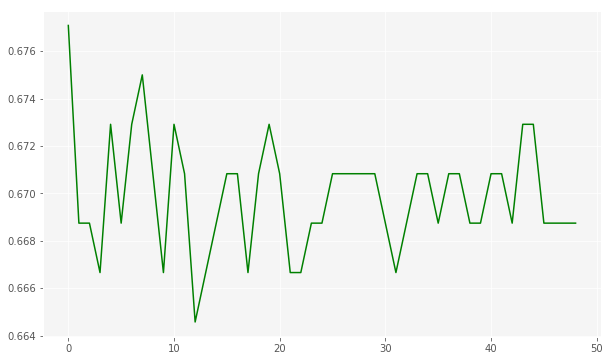

In [53]:
acc = []
rfc = RandomForestClassifier(n_estimators = 100,  warm_start = True, random_state = 42)
for i in range(49):
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, rfc.predict(X_test)))
    rfc.n_estimators += 100

plt.plot(acc, '-g')

Сейчас аккураси мы считали без кросс-валидации, поэтому получились большие скачки. Виден небольшой отрицательный тренд  на первых значениях n_estimators (от 100 до 1000),а потом он держится на одном уровне. Стоит рассмотреть левую часть графика с меньшими шагами n_estimators:

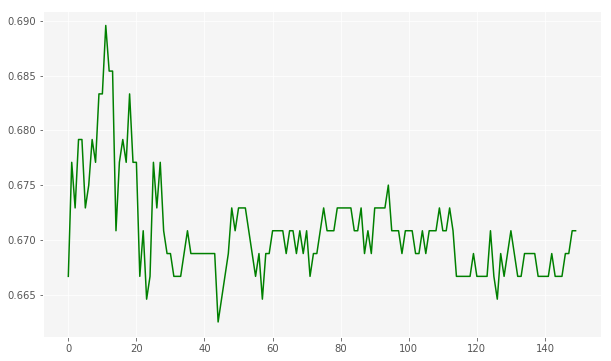

In [56]:
acc = []
rfc = RandomForestClassifier(n_estimators = 40,  warm_start = True, random_state = 42)
for i in range(150):
    rfc.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, rfc.predict(X_test)))
    rfc.n_estimators += 3

plt.plot(acc, '-g');

In [58]:
np.argmax(acc)*3+40

73

Можно сделать вывод, что после некоторого оптимального числа базовых алгоритмов (73 среди рассмотренных) качество ансамбля с дальнейшим ростом n_estimators падает, что может быть связано с переобучением

### IV. Нейронные сети

*На обучение нейросетей может уйти больше часа, не откладывайте этот пункт на последний день*.

__9 (1 балл)__

>В этом задании вам предстоит обучить нейронную сеть на датасете [MNIST](https://en.wikipedia.org/wiki/MNIST_database) с помощью пакета [keras](https://keras.io).

In [762]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

>Обучите нейронную сеть с двумя скрытыми слоями в каждой из которых поместите по 100 нейронов. Какого качества удается добиться на тесте?

In [723]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [766]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')

In [741]:
model = Sequential()

model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'selu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [743]:
model.fit(x=X_train, y=Y_train, batch_size=200, epochs = 15, verbose=1,
          validation_data=(X_test, Y_test), callbacks = [earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 146us/step - loss: 0.0955 - acc: 0.9713 - val_loss: 0.1070 - val_acc: 0.9667
Epoch 2/15
60000/60000 [==============================] - 9s 150us/step - loss: 0.0863 - acc: 0.9739 - val_loss: 0.0972 - val_acc: 0.9692
Epoch 3/15
60000/60000 [==============================] - 8s 132us/step - loss: 0.0779 - acc: 0.9767 - val_loss: 0.0906 - val_acc: 0.9726
Epoch 4/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.0688 - acc: 0.9794 - val_loss: 0.0956 - val_acc: 0.9709
Epoch 5/15
60000/60000 [==============================] - 7s 124us/step - loss: 0.0618 - acc: 0.9813 - val_loss: 0.0933 - val_acc: 0.9686
Epoch 6/15
60000/60000 [==============================] - 7s 122us/step - loss: 0.0561 - acc: 0.9830 - val_loss: 0.0836 - val_acc: 0.9742
Epoch 7/15
60000/60000 [==============================] - 8s 128us/step - loss: 0.0513 - acc: 0.9842 - val_loss: 0.0887 - 

Получили точность меньше 0.98; начиная с 11 эпохи качество на валидации стало падать от переобучения, поэтому оно прервалось раньше 15-й эпохи

>__10 (2 балл)__
Добавьте сверточные и pooling слои (вы можете также убрать Dense слои), добейтесь большего качества. Для успешного выполнения задания получите accuracy больше 0.99 на тестовой выборке. 

>Рекомендации: после сверточных слоев наиболее эффективно добавлять MaxPooling слои, в конце перед последним слоем поставьте Dense слои с достаточно большим количеством нейронов. Подвигайте количество слоев, learning rate, функции активации.

In [719]:
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

In [735]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'selu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(300, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [729]:
model.fit(x=X_train, y=Y_train, batch_size=200, epochs = 6, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2081 - acc: 0.9396 - val_loss: 0.0564 - val_acc: 0.9810
Epoch 2/6
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0572 - acc: 0.9826 - val_loss: 0.0388 - val_acc: 0.9864
Epoch 3/6
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0391 - acc: 0.9877 - val_loss: 0.0358 - val_acc: 0.9888
Epoch 4/6
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0284 - acc: 0.9916 - val_loss: 0.0370 - val_acc: 0.9887
Epoch 5/6
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0216 - acc: 0.9934 - val_loss: 0.0285 - val_acc: 0.9899
Epoch 6/6
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0184 - acc: 0.9941 - val_loss: 0.0277 - val_acc: 0.9908


Точность на тестовой выборке 0.9908 получена; значительное падение ошибки и рост валидационной точности на последних трёх эпохах даёт надежду на то, что можно было бы обучать модель и дольше

In [736]:
model.fit(x=X_train, y=Y_train, batch_size=200, epochs = 12, verbose=1,
          validation_data=(X_test, Y_test), callbacks = [earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2098 - acc: 0.9401 - val_loss: 0.0591 - val_acc: 0.9808
Epoch 2/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0585 - acc: 0.9818 - val_loss: 0.0460 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0413 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0298 - acc: 0.9910 - val_loss: 0.0296 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0222 - acc: 0.9930 - val_loss: 0.0341 - val_acc: 0.9881
Epoch 6/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0175 - acc: 0.9943 - val_loss: 0.0301 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0131 - acc: 0.9957 - val_loss: 0.0296 - val_acc

Поскольку была выбрана "терпеливая" конфигурация ранней остановки обучения (останавливаем, если на 3 эпохах подряд подряд валидационный loss вырос), то результат на самой последней эпохе получился ниже 0.99, но вообще видим, что точность 0,99 и немного выше достигается этой моделью (просто нужно поставить нетерпеливый early stopping, чтобы она была на финальной эпохе до того, как начнётся падение точности из-за переобучения).

>__11 (1 балл)__
Добавьте 1 или 2 dropout слоя внутрь сети предыдущего шага. Удается ли добиться большего качества? Что происходит с процессом обучения? 

In [731]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'selu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(300, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [734]:
model.fit(x=X_train, y=Y_train, batch_size=200, epochs = 12, verbose=1,
          validation_data=(X_test, Y_test), callbacks = [earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0203 - acc: 0.9937 - val_loss: 0.0357 - val_acc: 0.9890
Epoch 2/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0185 - acc: 0.9939 - val_loss: 0.0254 - val_acc: 0.9921
Epoch 3/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0154 - acc: 0.9945 - val_loss: 0.0271 - val_acc: 0.9915
Epoch 4/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0136 - acc: 0.9954 - val_loss: 0.0279 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0133 - acc: 0.9955 - val_loss: 0.0245 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0118 - acc: 0.9958 - val_loss: 0.0234 - val_acc: 0.9926
Epoch 7/12
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0120 - acc: 0.9961 - val_loss: 0.0265 - val_acc

Выключение части нейронов позволяет контролировать переобучение. При добавлении дропаута ошибка на валидационной выборке на каждой эпохе в основном ниже, чем без дропаута. Итоговая точность при добавлении 2 слоёв Dropout получилась выше, чем в предыдущем пункте: 0.9919, и на нескольких последних эпохах она стабильно выше 0.991, в то время как без дропаута мы не смогли достичь точности при валидации 0.991